# Image Processing with CV2

In [3]:
# Importing the necessary Python library
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Reading In and Displaying Images

In [2]:
# Reading in the image from file
img = cv2.imread('../data/empty_parking_lot.jpeg')

In [6]:
# Changing the default color channels of the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

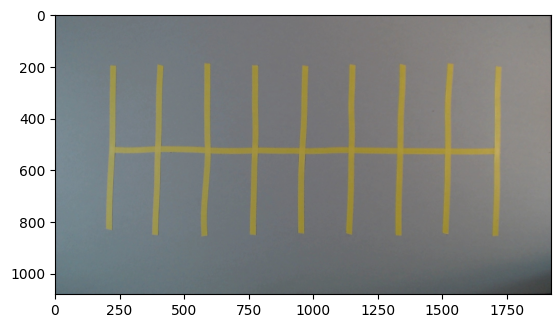

In [7]:
# Displaying the image with the use of matplotlib
plt.imshow(img);

## Changing and Processing Color

## Drawing Shapes onto Images

## Saving Images